In [1]:
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


In [2]:
%cd /gdrive/MyDrive/testOnlyMe

/gdrive/MyDrive/testOnlyMe


### Import libraries

In [3]:

import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from PIL import Image
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight


tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

################################################################################### # Random seed for reproducibility

seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

###################################################################################  Suppress warnings

import warnings
import logging

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)
tf.get_logger().setLevel('INFO')
tf.autograph.set_verbosity(0)

tf.get_logger().setLevel(logging.ERROR)
tf.get_logger().setLevel('ERROR')
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
###################################################################################  Suppress warnings
#Dataset folders 
dataset_dir = 'testNtrain'
training_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'val')
# test_dir = os.path.join(dataset_dir, 'test')

# dataset_dir = 'training_data_final'
# # training_dir = os.path.join(dataset_dir, 'train')
# # validation_dir = os.path.join(dataset_dir, 'val')
# # test_dir = os.path.join(dataset_dir, 'test')
# training_dir = dataset_dir




labels = ["Species1",   #0
          "Species2",   #1
          "Species3",   #2
          "Species4",   #3
          "Species5",   #4
          "Species6",   #5
          "Species7",   #6
          "Species8" ]  #7


2.9.2


In [4]:
# Images are divided into folders, one for each class. 
# If the images are organized in such a way, we can exploit the 
# ImageDataGenerator to read them from disk.
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.preprocessing.image import ImageDataGenerator




# Create an instance of ImageDataGenerator for training, validation, and test sets
train_data_gen = ImageDataGenerator()
valid_data_gen = ImageDataGenerator()
# test_data_gen = ImageDataGenerator()

# Obtain a data generator with the 'ImageDataGenerator.flow_from_directory' method
train_gen = train_data_gen.flow_from_directory(directory=training_dir,
                                               target_size=(96,96),
                                               color_mode='rgb',
                                               classes=None, # can be set to labels
                                               class_mode='categorical',
                                               batch_size=8,
                                               shuffle=True,
                                               seed=seed)
valid_gen = train_data_gen.flow_from_directory(directory=validation_dir,
                                               target_size=(96,96),
                                               color_mode='rgb',
                                               classes=None, # can be set to labels
                                               class_mode='categorical',
                                               batch_size=8,
                                               shuffle=False,
                                               seed=seed)
# test_gen = train_data_gen.flow_from_directory(directory=test_dir,
#                                               target_size=(96,96),
#                                               color_mode='rgb',
#                                               classes=None, # can be set to labels
#                                               class_mode='categorical',
#                                               batch_size=8,
#                                               shuffle=False,
#                                               seed=seed)

###################################################################################
# Create some augmentation examples
# Get sample image
image = next(train_gen)[0][4]

# Create an instance of ImageDataGenerator for each transformation
rot_gen = ImageDataGenerator(rotation_range=30)
shift_gen = ImageDataGenerator(width_shift_range=50)
zoom_gen = ImageDataGenerator(zoom_range=0.3)
flip_gen = ImageDataGenerator(horizontal_flip=True)



###################################################################################
# Combine multiple transformations
gen = ImageDataGenerator(rotation_range=30,
                         height_shift_range=50,
                         width_shift_range=50,
                         zoom_range=0.3,
                         horizontal_flip=True,
                         vertical_flip=True, 
                         fill_mode='reflect')



Found 3007 images belonging to 8 classes.
Found 535 images belonging to 8 classes.


# Training with and without data augmentation

In [18]:

# Create an instance of ImageDataGenerator with NO Data Augmentation


from tensorflow.keras.applications.vgg16 import preprocess_input


# noaug_train_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input,rescale=1/255.) # rescale value is multiplied to the image
# valid_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input,rescale=1/255.)
# test_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input,rescale=1/255.)

# noaug_train_data_gen = ImageDataGenerator(featurewise_center = 1,
#                                           featurewise_std_normalization=1,
#                                           preprocessing_function=preprocess_input)


noaug_train_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
valid_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)


# noaug_train_data_gen = ImageDataGenerator(    rescale=1/255.,
#                                             featurewise_std_normalization=1,
#                                             featurewise_center = 1,)


# #noaug_train_data_gen = ImageDataGenerator()
# valid_data_gen = ImageDataGenerator( rescale=1/255.,
#                                     featurewise_std_normalization=1,
#                                     featurewise_center = 1)

# test_data_gen = ImageDataGenerator( rescale=1/255.)




# Obtain a data generator with the 'ImageDataGenerator.flow_from_directory' method
noaug_train_gen = noaug_train_data_gen.flow_from_directory(directory=training_dir,
                                                           target_size=(96,96),
                                                           color_mode='rgb',
                                                           classes=None, # can be set to labels
                                                           class_mode='categorical',
                                                           batch_size=8,
                                                           shuffle=True,
                                                           seed=seed)

valid_gen = valid_data_gen.flow_from_directory(directory=validation_dir,
                                               target_size=(96,96),
                                               color_mode='rgb',
                                               classes=None, # can be set to labels
                                               class_mode='categorical',
                                               batch_size=8,
                                               shuffle=False,
                                               seed=seed)
# test_gen = test_data_gen.flow_from_directory(directory=test_dir,
#                                              target_size=(96,96),
#                                              color_mode='rgb',
#                                              classes=None, # can be set to labels
#                                              class_mode='categorical',
#                                              batch_size=8,
#                                              shuffle=False,
#                                              seed=seed)

###################################################################################
# Create an instance of ImageDataGenerator with Data Augmentation

aug_train_data_gen = ImageDataGenerator(                                        
                                        rotation_range=30,
                                        height_shift_range=50,
                                        width_shift_range=50,
                                        featurewise_std_normalization=1,
                                        zoom_range=0.3,
                                        horizontal_flip=True,
                                        vertical_flip=True, 
                                        fill_mode='reflect',
                                        featurewise_center = 1,
                                        preprocessing_function=preprocess_input,
                                        # rescale=1/255.
                                        ) # rescale value is multiplied to the image




# Obtain a data generator with the 'ImageDataGenerator.flow_from_directory' method
aug_train_gen = aug_train_data_gen.flow_from_directory(directory=training_dir,
                                                       target_size=(96,96),
                                                       color_mode='rgb',
                                                       classes=None, # can be set to labels
                                                       class_mode='categorical',
                                                       batch_size=8,
                                                       shuffle=True,
                                                       seed=seed)

Found 3007 images belonging to 8 classes.
Found 535 images belonging to 8 classes.
Found 3007 images belonging to 8 classes.


### Models metadata

In [6]:
input_shape = (96, 96, 3)
epochs = 200

In [7]:
# class_weights = {
#     0:0.251,
#     1:0.088,
#     2:0.091,
#     3:0.092,
#     4:0.88,
#     5:0.211,
#     6:0.087,
#     7:0.092
# }

In [8]:
class_weights = compute_class_weight(class_weight = 'balanced',classes=np.unique(noaug_train_gen.classes), y=aug_train_gen.classes)
class_weights= dict(enumerate(class_weights.flatten(), 0))


### Transfer learning

In [ ]:
del tl_model
del tl_history

del ft_model
del ft_history

Model: "efficientnetv2-l"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 rescaling_1 (Rescaling)        (None, 96, 96, 3)    0           ['input_4[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 48, 48, 32)   864         ['rescaling_1[0][0]']            
                                                                                                  
 stem_bn (BatchNormalization)   (None, 48, 48, 32)   128         ['stem_conv[0][0]']              
                                                                                   

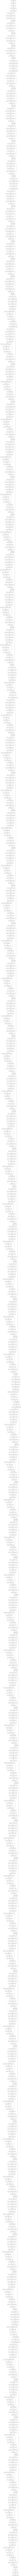

In [26]:
# Download and plot the VGG16 model
# supernet = tfk.applications.VGG16(
#     include_top=False,
#     weights="imagenet",
#     input_shape=(96,96,3)
# )
# supernet.summary()
# tfk.utils.plot_model(supernet)


supernet = tfk.applications.EfficientNetV2L(
    include_top=False,
    weights="imagenet",
    input_shape=(96,96,3)
)
supernet.summary()
tfk.utils.plot_model(supernet)

In [11]:
# # Use the supernet as feature extractor
# supernet.trainable = False

# inputs = tfk.Input(shape=input_shape)
# x = tfkl.Resizing(96, 96, interpolation="bicubic")(inputs)
# x = supernet(x)
# x = tfkl.Flatten(name='Flattening')(x)
# x = tfkl.Dropout(0.3, seed=seed)(x)
# x = tfkl.Dense(
#     512, activation='relu', kernel_initializer = tfk.initializers.HeUniform(seed), use_bias = True )(x)

# x = tfkl.BatchNormalization()(x)
# #x = tfk.activations.relu(x)
# outputs = tfkl.Dense(
#     8, 
#     activation='softmax',
#     kernel_initializer = tfk.initializers.GlorotUniform(seed) , use_bias = True)(x)



# # Connect input and output through the Model class
# tl_model = tfk.Model(inputs=inputs, outputs=outputs, name='model')

# # Compile the model
# tl_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')
# tl_model.summary()
# Use the supernet as feature extractor
supernet.trainable = False

inputs = tfk.Input(shape=input_shape)
x = tfkl.Resizing(96, 96, interpolation="bicubic")(inputs)
x = supernet(x)
x = tfkl.Flatten(name='Flattening')(x)
x = tfkl.Dropout(0.3, seed=seed)(x)
x = tfkl.Dense(
    1280, activation='relu', kernel_initializer = tfk.initializers.HeUniform(seed), use_bias = True )(x)

x = tfkl.BatchNormalization()(x)
#x = tfk.activations.relu(x)
outputs = tfkl.Dense(
    8, 
    activation='softmax',
    kernel_initializer = tfk.initializers.GlorotUniform(seed) , use_bias = True)(x)



# Connect input and output through the Model class
tl_model = tfk.Model(inputs=inputs, outputs=outputs, name='model')

# Compile the model
tl_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')
tl_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 resizing_1 (Resizing)       (None, 96, 96, 3)         0         
                                                                 
 efficientnetv2-l (Functiona  (None, 3, 3, 1280)       117746848 
 l)                                                              
                                                                 
 Flattening (Flatten)        (None, 11520)             0         
                                                                 
 dropout_1 (Dropout)         (None, 11520)             0         
                                                                 
 dense_2 (Dense)             (None, 1280)              14746880  
                                                             

In [47]:
# Train the model
tl_history = tl_model.fit(
    
    x = aug_train_gen,
    batch_size = 512 ,
    epochs = 200,
    validation_data = valid_gen,
    class_weight = class_weights,
    callbacks = [tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=20, restore_best_weights=True)]
).history

Epoch 1/200
376/376 [==============================] - 82s 219ms/step - loss: 0.5828 - accuracy: 0.7998 - val_loss: 1.8788 - val_accuracy: 0.7944
Epoch 2/200
376/376 [==============================] - 81s 215ms/step - loss: 0.5274 - accuracy: 0.8261 - val_loss: 1.2351 - val_accuracy: 0.7888
Epoch 3/200
376/376 [==============================] - 81s 214ms/step - loss: 0.5075 - accuracy: 0.8307 - val_loss: 2.4539 - val_accuracy: 0.7850
Epoch 4/200
376/376 [==============================] - 81s 216ms/step - loss: 0.4941 - accuracy: 0.8344 - val_loss: 1.0166 - val_accuracy: 0.8112
Epoch 5/200
376/376 [==============================] - 81s 215ms/step - loss: 0.4924 - accuracy: 0.8311 - val_loss: 1.4847 - val_accuracy: 0.7813
Epoch 6/200
376/376 [==============================] - 81s 215ms/step - loss: 0.4637 - accuracy: 0.8480 - val_loss: 2.2841 - val_accuracy: 0.8112
Epoch 7/200
376/376 [==============================] - 80s 214ms/step - loss: 0.4521 - accuracy: 0.8477 - val_loss: 1.2377 -

In [48]:
tl_model.evaluate(valid_gen, return_dict=True)

67/67 [==============================] - 4s 59ms/step - loss: 0.8503 - accuracy: 0.8523


{'loss': 0.8503133654594421, 'accuracy': 0.8523364663124084}

In [ ]:
# Save the best model
tl_model.save('modelvgg19_1')

In [ ]:
# tl_model = tfk.models.load_model("BESTfinetuning78")

In [ ]:
model_aug = tfk.models.load_model("TransferLearningModel")
model_aug_test_metrics = model_aug.evaluate(test_gen, return_dict=True)

In [ ]:
model_aug = tfk.models.load_model("TransferLearningModel")
model_aug_test_metrics = model_aug.evaluate(train_gen, return_dict=True)

In [ ]:
model_aug = tfk.models.load_model("TransferLearningModel")
model_aug_test_metrics = model_aug.evaluate(valid_gen, return_dict=True)  

In [ ]:
# Re-load the model after transfer learning
ft_model = tfk.models.load_model('TransferLearningModel')
ft_model.summary()

In [27]:
# Re-load the model after transfer learning
ft_model = tl_model
ft_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 resizing_1 (Resizing)       (None, 96, 96, 3)         0         
                                                                 
 efficientnetv2-l (Functiona  (None, 3, 3, 1280)       117746848 
 l)                                                              
                                                                 
 Flattening (Flatten)        (None, 11520)             0         
                                                                 
 dropout_1 (Dropout)         (None, 11520)             0         
                                                                 
 dense_2 (Dense)             (None, 1280)              14746880  
                                                             

In [38]:
# Unfreeze the base model
ft_model.trainable = True




In [34]:
# Set all VGG layers to True
ft_model.get_layer('EfficientNetV2L').trainable = True
for i, layer in enumerate(ft_model.get_layer('input_3').layers):
   print(i, layer.name, layer.trainable)

ValueError: ignored

In [ ]:
# Freeze first N layers, e.g., until 14th
for i, layer in enumerate(ft_model.get_layer('vgg19').layers[:0]):
  layer.trainable=False
for i, layer in enumerate(ft_model.get_layer('vgg19').layers):
   print(i, layer.name, layer.trainable)
ft_model.summary()

0 input_10 True
1 block1_conv1 True
2 block1_conv2 True
3 block1_pool True
4 block2_conv1 True
5 block2_conv2 True
6 block2_pool True
7 block3_conv1 True
8 block3_conv2 True
9 block3_conv3 True
10 block3_conv4 True
11 block3_pool True
12 block4_conv1 True
13 block4_conv2 True
14 block4_conv3 True
15 block4_conv4 True
16 block4_pool True
17 block5_conv1 True
18 block5_conv2 True
19 block5_conv3 True
20 block5_conv4 True
21 block5_pool True
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 96, 96, 3)]       0         
                                                                 
 resizing_4 (Resizing)       (None, 96, 96, 3)         0         
                                                                 
 vgg19 (Functional)          (None, 3, 3, 512)         20024384  
                                                                 
 Flattening (F

In [39]:
# Compile the model
ft_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(1e-4), metrics='accuracy')

In [49]:
# Fine-tune the model
ft_history = ft_model.fit(
    x = noaug_train_gen,
    batch_size = 512,
    epochs = 200,
    class_weight = class_weights,
    validation_data = valid_gen,
    callbacks = [tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=15, restore_best_weights=True)]
).history

Epoch 1/200
376/376 [==============================] - 82s 217ms/step - loss: 0.1540 - accuracy: 0.9531 - val_loss: 0.3351 - val_accuracy: 0.8916
Epoch 2/200
376/376 [==============================] - 80s 213ms/step - loss: 0.0967 - accuracy: 0.9721 - val_loss: 0.4823 - val_accuracy: 0.8879
Epoch 3/200
376/376 [==============================] - 81s 214ms/step - loss: 0.0584 - accuracy: 0.9860 - val_loss: 1.2098 - val_accuracy: 0.9028
Epoch 4/200
376/376 [==============================] - 80s 214ms/step - loss: 0.0576 - accuracy: 0.9864 - val_loss: 0.3127 - val_accuracy: 0.8972
Epoch 5/200
376/376 [==============================] - 80s 212ms/step - loss: 0.0451 - accuracy: 0.9887 - val_loss: 0.6690 - val_accuracy: 0.8804
Epoch 6/200
376/376 [==============================] - 80s 213ms/step - loss: 0.0517 - accuracy: 0.9877 - val_loss: 2.1754 - val_accuracy: 0.8766
Epoch 7/200
376/376 [==============================] - 80s 212ms/step - loss: 0.0685 - accuracy: 0.9820 - val_loss: 2.9918 -

In [50]:
 ft_model.evaluate(valid_gen, return_dict=True)

67/67 [==============================] - 4s 58ms/step - loss: 2.2256 - accuracy: 0.9065


{'loss': 2.2256340980529785, 'accuracy': 0.9065420627593994}

In [51]:
# Save the best model
ft_model.save('aaaaaaa')

In [ ]:
model_ft = tfk.models.load_model("BESTfinetuning")
model_ft_test_metrics = model_ft.evaluate(test_gen, return_dict=True)

In [ ]:
model_ft = tfk.models.load_model("BESTfinetuning")
model_ft_test_metrics = model_ft.evaluate(train_gen, return_dict=True)

In [ ]:
model_ft = tfk.models.load_model("BESTfinetuning")
model_ft_test_metrics = model_ft.evaluate(valid_gen, return_dict=True)

In [ ]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average


In [ ]:
del ensemble_model

In [ ]:


modelvgg19_1 = load_model('modelvgg19_1')
modelvgg19_2 = load_model('modelvgg19_2')

model_4 = load_model('model_4')
model_3 = load_model('model_3')
# model_2 = load_model('model_2')
# model_1 = load_model('model_1')



modelvgg19_1 = Model(inputs=modelvgg19_1.inputs, outputs=modelvgg19_1.outputs, name='modelvgg19_1')
modelvgg19_2 = Model(inputs=modelvgg19_2.inputs, outputs=modelvgg19_2.outputs, name='modelvgg19_2')

model_4 = Model(inputs=model_4.inputs, outputs=model_4.outputs, name='model_4')
model_3 = Model(inputs=model_3.inputs, outputs=model_3.outputs, name='model_3')
# model_2 = Model(inputs=model_2.inputs, outputs=model_2.outputs, name='model_2')
# model_1 = Model(inputs=model_1.inputs, outputs=model_1.outputs, name='model_1')

##################################################################################





In [ ]:
models = [model_4, model_3 ,modelvgg19_2, modelvgg19_1  ]
model_input = Input(shape=(96, 96, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = Average()(model_outputs)
ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')
ensemble_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(1e-4), metrics='accuracy')


In [ ]:
ensemble_model_metrics=ensemble_model.evaluate(noaug_train_gen,return_dict=True)
ensemble_model.summary 

376/376 [==============================] - 25s 63ms/step - loss: 0.0523 - accuracy: 0.9997


<bound method Model.summary of <keras.engine.functional.Functional object at 0x7f86ab9ad7d0>>

In [ ]:
ensemble_history = ensemble_model.fit(
    x = noaug_train_gen,
    batch_size = 512,
    epochs = 200,
    class_weight = class_weights,
    validation_data = valid_gen,
    callbacks = [tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=15, restore_best_weights=True)]
).history

Epoch 1/200
376/376 [==============================] - 71s 180ms/step - loss: 0.0774 - accuracy: 0.9963 - val_loss: 0.4144 - val_accuracy: 0.8897
Epoch 2/200
376/376 [==============================] - 67s 179ms/step - loss: 0.0584 - accuracy: 0.9970 - val_loss: 0.3365 - val_accuracy: 0.9140
Epoch 3/200
376/376 [==============================] - 67s 178ms/step - loss: 0.0479 - accuracy: 0.9990 - val_loss: 0.3558 - val_accuracy: 0.8991
Epoch 4/200
376/376 [==============================] - 67s 178ms/step - loss: 0.0659 - accuracy: 0.9953 - val_loss: 0.4230 - val_accuracy: 0.8785
Epoch 5/200
376/376 [==============================] - 67s 178ms/step - loss: 0.0727 - accuracy: 0.9930 - val_loss: 0.3505 - val_accuracy: 0.9009
Epoch 6/200
376/376 [==============================] - 67s 178ms/step - loss: 0.0434 - accuracy: 0.9977 - val_loss: 0.3494 - val_accuracy: 0.8991
Epoch 7/200
376/376 [==============================] - 67s 178ms/step - loss: 0.0350 - accuracy: 0.9983 - val_loss: 0.4457 -

KeyboardInterrupt: ignored

In [ ]:
ensemble_model_metrics=ensemble_model.evaluate(valid_gen,return_dict=True)

67/67 [==============================] - 4s 63ms/step - loss: 0.3803 - accuracy: 0.9215


In [ ]:
model_aa = tfk.models.load_model("ensm_best2")
model_ft_test_metrics = model_aa.evaluate(valid_gen, return_dict=True)

67/67 [==============================] - 7s 91ms/step - loss: 0.3967 - accuracy: 0.9121


In [ ]:
# Save the best model
ensemble_model.save('ensm_wow')

In [ ]:


#--------- Assembly


from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average



model_1 = load_model('Assembling/EfficientNetV2B0/FineTuningModel 73_')
model_1 = Model(inputs=model_1.inputs,
                outputs=model_1.outputs,
                name='EfficientNetV2B0')


model_2 = load_model('Assembling/RestNet50/TransferLearningModel')
model_2 = Model(inputs=model_2.inputs,
                outputs=model_2.outputs,
                name='ResNet50')


model_3 = load_model('Assembling/vgg16/BESTfinetuning')
model_3 = Model(inputs=model_3.inputs,
                outputs=model_3.outputs,
                name='vgg16')
#model_4 = load_model('Assembling/TransferLearningModel')#sia replace, add weight to model
#model_4 = Model(inputs=model_4.inputs,
#                outputs=model_4.outputs,
#                name='efficientother')

#add ali's

model_4 = load_model('Assembling/Ali/SubmissionModel')#sia replace, add weight to model
model_4 = Model(inputs=model_4.inputs,
               outputs=model_4.outputs,
               name='SubmissionModel')


models = [ model_2, model_3,model_1,model_4]
model_input = Input(shape=(96, 96, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = Average()(model_outputs)
ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')
ensemble_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(1e-4), metrics='accuracy')

ensemble_model_metrics=ensemble_model.evaluate(test_gen,return_dict=True)
ensemble_model.summary 

# class_weights = compute_class_weight(class_weight = 'balanced',classes=np.unique(noaug_train_gen.classes), y=noaug_train_gen.classes)
#class_weights= dict(enumerate(class_weights.flatten(), 0))
# print(class_weights)
ensemble_history = ensemble_model.fit(
    x = noaug_train_gen,
    batch_size = 512,
    epochs = 200,
    class_weight = class_weights,
    validation_data = valid_gen,
    callbacks = [tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=15, restore_best_weights=True)]
).history

ensemble_model_metrics=ensemble_model.evaluate(test_gen,return_dict=True)


ensemble_model.save('EnsembleModelTrained:'+str(ensemble_model_metrics['accuracy']))


import visualkeras
visualkeras.layered_view(ensemble_model,legend=True).show()